Reading .csv:
f
l
d
u
r
16500
15600
17400
15600
15000
Separating EMG signal channels:
d
u
l
r
f
Reading .csv:
f
l
d
u
r
30000
30000
30000
30000
30000
Separating EMG signal channels:
d
u
l
r
f
Reading .csv:
f
l
d
u
r
16643
15948
16200
13500
16667
Separating EMG signal channels:
d
u
l
r
f
Lengths of each action: (down, up, left, right, and fist)
63143
63143
63143
61548
61548
61548
63600
63600
63600
59100
59100
59100
61667
61667
61667
d


/usr/local/lib/python3.6/dist-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 100, using nperseg = 100
  .format(nperseg, input_length))


u
l
r
f
Loading completed
(517, 24)
(517, 6)
(173, 24)
(173, 6)
(172, 24)
(172, 6)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               2500      
_________________________________________________________________
batch_normalization (BatchNo (None, 100)               400       
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
batch_normalization_1 (Batch (None, 100)               400       
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 606       
Total params: 24,106
Trainable params: 

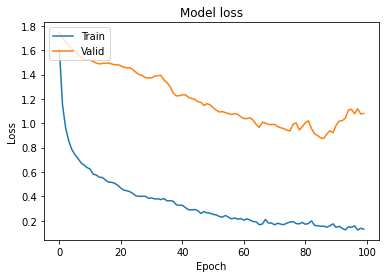

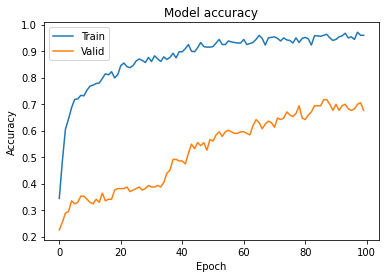

Test loss: 0.995539128780365
Test accuracy: 0.7034883499145508


In [1]:
import csv
import glob, os
import pandas as pd
from scipy.signal import find_peaks
from scipy import signal
from scipy.fft import fft, ifft, fftfreq
import matplotlib.pyplot as plt
import numpy as np
import math
# csv reader (faster)
emg_1_csv={'d': [] , 'u': [], 'l': [], 'r': [], 'f': []}
emg_2_csv={'d': [] , 'u': [], 'l': [], 'r': [], 'f': []}
emg_3_csv={'d': [] , 'u': [], 'l': [], 'r': [], 'f': []}
actionList = ['d', 'u', 'l', 'r', 'f']


folderPath_hyq = os.path.abspath('Dataset/hyq')
folderPath_zjh = os.path.abspath('Dataset/zjh')
folderPath_sgf = os.path.abspath('Dataset/sgf')

filePathList=[]
filePathList.append(glob.glob(os.path.join(folderPath_hyq, "*.csv")))
filePathList.append(glob.glob(os.path.join(folderPath_zjh, "*.csv")))
filePathList.append(glob.glob(os.path.join(folderPath_sgf, "*.csv")))


for filePathListIndex in filePathList:
    csvData={'d': [] , 'u': [], 'l': [], 'r': [], 'f': []}
    dl=[]
    print('Reading .csv:')
    for f in filePathListIndex:
        csvData[f[-5]] = pd.read_csv(f, header=None).values.tolist()
        print(f[-5])

    print(len(csvData['d']))
    print(len(csvData['u']))
    print(len(csvData['l']))
    print(len(csvData['r']))
    print(len(csvData['f']))
    print('Separating EMG signal channels:')
    for currentAction in actionList:
        print(currentAction)
        for row in range(len(csvData[currentAction])):
            emg_1_csv[currentAction].append(csvData[currentAction][row][0])
            emg_2_csv[currentAction].append(csvData[currentAction][row][1])
            emg_3_csv[currentAction].append(csvData[currentAction][row][2])



print('Lengths of each action: (down, up, left, right, and fist)')
print(len(emg_1_csv['d']))
print(len(emg_2_csv['d']))
print(len(emg_3_csv['d']))
print(len(emg_1_csv['u']))
print(len(emg_2_csv['u']))
print(len(emg_3_csv['u']))
print(len(emg_1_csv['l']))
print(len(emg_2_csv['l']))
print(len(emg_3_csv['l']))
print(len(emg_1_csv['r']))
print(len(emg_2_csv['r']))
print(len(emg_3_csv['r']))
print(len(emg_1_csv['f']))
print(len(emg_2_csv['f']))
print(len(emg_3_csv['f']))

peaksf, _ = find_peaks(emg_3_csv['f'], distance=150, height =150)
peaksd, _ = find_peaks(emg_3_csv['d'], distance=150, height =150)
peaksu, _ = find_peaks(emg_3_csv['u'], distance=150, height =150)
peaksl, _ = find_peaks(emg_3_csv['l'], distance=150, height =150)
peaksr, _ = find_peaks(emg_3_csv['r'], distance=150, height =150)

emg_1_window={'d': {} , 'u': {}, 'l': {}, 'r': {}, 'f': {}}
emg_2_window={'d': {} , 'u': {}, 'l': {}, 'r': {}, 'f': {}}
emg_3_window={'d': {} , 'u': {}, 'l': {}, 'r': {}, 'f': {}}

index1=0
for i in peaksf[1:-1]:

    emg_1_window['f'][index1]=emg_1_csv['f'][i-50:i+50]
    emg_2_window['f'][index1]=emg_2_csv['f'][i-50:i+50]
    emg_3_window['f'][index1]=emg_3_csv['f'][i-50:i+50]
    index1=index1+1

index2=0
for i in peaksd[1:-1]:

    emg_1_window['d'][index2]=emg_1_csv['d'][i-50:i+50]
    emg_2_window['d'][index2]=emg_2_csv['d'][i-50:i+50]
    emg_3_window['d'][index2]=emg_3_csv['d'][i-50:i+50]
    index2=index2+1

index3=0
for i in peaksu[1:-1]:
    i = int(i)

    emg_1_window['u'][index3]=emg_1_csv['u'][i-50:i+50]
    emg_2_window['u'][index3]=emg_2_csv['u'][i-50:i+50]
    emg_3_window['u'][index3]=emg_3_csv['u'][i-50:i+50]
    index3=index3+1

index4=0
for i in peaksl[1:-1]:
    i = int(i)

    emg_1_window['l'][index4]=emg_1_csv['l'][i-50:i+50]
    emg_2_window['l'][index4]=emg_2_csv['l'][i-50:i+50]
    emg_3_window['l'][index4]=emg_3_csv['l'][i-50:i+50]
    index4=index4+1

index5=0
for i in peaksr[1:-1]:
    i = int(i)

    emg_1_window['r'][index5]=emg_1_csv['r'][i-50:i+50]
    emg_2_window['r'][index5]=emg_2_csv['r'][i-50:i+50]
    emg_3_window['r'][index5]=emg_3_csv['r'][i-50:i+50]
    index5=index5+1


# plt.plot(emg_1_window['f'][0])
# plt.plot(emg_2_window['f'][0])
# plt.plot(emg_3_window['f'][0])
# plt.legend(['Channel 1', 'Channel 2', 'Channel 3'])
# plt.xlabel('Samples')
# plt.ylabel('ADC Value')
# plt.grid()
# plt.show()
# # feature extraction
# print(emg_1_window)
featureDict = {'d': {} , 'u': {}, 'l': {}, 'r': {}, 'f': {}}
featureList = []

fs = 100 # sample frequency
T = 1/fs # sample rate


for actionIndex in range(len(actionList)):
  emg_1=[]
  emg_2=[]
  emg_3=[]
  print(actionList[actionIndex])
  for row in range(len(emg_1_window[actionList[actionIndex]])):
    emg_1=emg_1_window[actionList[actionIndex]][row]
    emg_2=emg_2_window[actionList[actionIndex]][row]
    emg_3=emg_3_window[actionList[actionIndex]][row]
    # print(np.nan in emg_1)
    # print(np.nan in emg_2)
    # print(np.nan in emg_3)
    ### calculate time-domain features for every csv file

    # Mean Absolute Value
    mav_emg_1 = 0
    mav_emg_2 = 0
    mav_emg_3 = 0
    # Wavelength
    wl_emg_1 = 0
    wl_emg_2 = 0
    wl_emg_3 = 0
    # Slope Sign Changes
    sscThreshold = 0 # TODO: detemine the threshold
    ssc_emg_1 = 0
    ssc_emg_2 = 0
    ssc_emg_3 = 0
    # Zero Crossing: we don't have, do we?
    zc_emg_1 = 0
    zc_emg_2 = 0
    zc_emg_3 = 0
    # Root Mean Square
    rms_emg_1 = 0.0
    rms_emg_2 = 0.0
    rms_emg_3 = 0.0
    # frequency-domain features
    # Mean Frequency
    meanFreq_emg_1 = 0.0
    meanFreq_emg_2 = 0.0
    meanFreq_emg_3 = 0.0
    # Median Frequency
    medianFreq_emg_1 = 0.0
    medianFreq_emg_2 = 0.0
    medianFreq_emg_3 = 0.0
    # Mean Power
    meanPower_emg_1 = 0.0
    meanPower_emg_2 = 0.0
    meanPower_emg_3 = 0.0
    # Variance of Central Frequency
    vcf_emg_1 = 0.0
    vcf_emg_2 = 0.0
    vcf_emg_3 = 0.0

    # some temporary variables

    abs_sum_temp1=0
    abs_sum_temp2=0
    abs_sum_temp3=0
    ssc_temp1=0
    ssc_temp2=0
    ssc_temp3=0
    rms_temp1=0.0
    rms_temp2=0.0
    rms_temp3=0.0

    freqs_temp1, psd_temp1 = signal.welch(emg_1, fs)
    freqs_temp2, psd_temp2 = signal.welch(emg_2, fs)
    freqs_temp3, psd_temp3 = signal.welch(emg_3, fs)
    nominatorValue_temp1=0
    nominatorValue_temp2=0
    nominatorValue_temp3=0
    denominatorValue_temp1=0
    denominatorValue_temp2=0
    denominatorValue_temp3=0
    sm2_temp1=0
    sm2_temp2=0
    sm2_temp3=0

    i=0
    for i in range(len(emg_3)):
        # print(np.nan in emg_1)
        # print(np.nan in emg_2)
        # print(np.nan in emg_3)
        abs_sum_temp1 = abs_sum_temp1 + abs(int(emg_1[i]))
        abs_sum_temp2 = abs_sum_temp2 + abs(int(emg_2[i]))
        abs_sum_temp3 = abs_sum_temp3 + abs(int(emg_3[i]))

        rms_temp1 = rms_temp1 + (int(emg_1[i]))**2
        rms_temp2 = rms_temp2 + (int(emg_2[i]))**2
        rms_temp3 = rms_temp3 + (int(emg_3[i]))**2

        if(i>0):
          wl_emg_1 = wl_emg_1 + abs(int(emg_1[i]) - int(emg_1[i-1]))
          wl_emg_2 = wl_emg_2 + abs(int(emg_2[i]) - int(emg_2[i-1]))
          wl_emg_3 = wl_emg_3 + abs(int(emg_3[i]) - int(emg_3[i-1]))
        if(i>1):
            ssc_temp1 = (int(emg_1[i-1]) - int(emg_1[i-2])) * (int(emg_1[i-1]) - int(emg_1[i]))
            ssc_temp2 = (int(emg_2[i-1]) - int(emg_2[i-2])) * (int(emg_2[i-1]) - int(emg_2[i]))
            ssc_temp3 = (int(emg_3[i-1]) - int(emg_3[i-2])) * (int(emg_3[i-1]) - int(emg_3[i]))
            if ssc_temp1 >= sscThreshold:
                ssc_emg_1 = ssc_emg_1 + 1
            if ssc_temp2 >= sscThreshold:
                ssc_emg_2 = ssc_emg_2 + 1
            if ssc_temp3 >= sscThreshold:
                ssc_emg_3 = ssc_emg_3 + 1

        mav_emg_1 = abs_sum_temp1/len(emg_1)
        mav_emg_2 = abs_sum_temp2/len(emg_2)
        mav_emg_3 = abs_sum_temp3/len(emg_3)

        rms_emg_1 = math.sqrt(rms_temp1/len(emg_1))
        rms_emg_2 = math.sqrt(rms_temp2/len(emg_2))
        rms_emg_3 = math.sqrt(rms_temp3/len(emg_3))

    j=0
    for j in range(len(freqs_temp1)):
      nominatorValue_temp1 += freqs_temp1[j]*psd_temp1[j]
      nominatorValue_temp2 += freqs_temp2[j]*psd_temp2[j]
      nominatorValue_temp3 += freqs_temp3[j]*psd_temp3[j]
      denominatorValue_temp1 += psd_temp1[j]
      denominatorValue_temp2 += psd_temp2[j]
      denominatorValue_temp3 += psd_temp3[j]
      sm2_temp1 += np.square(freqs_temp1[j])*psd_temp1[j]
      sm2_temp2 += np.square(freqs_temp2[j])*psd_temp2[j]
      sm2_temp3 += np.square(freqs_temp3[j])*psd_temp3[j]

    meanFreq_emg_1 = nominatorValue_temp1/denominatorValue_temp1
    meanFreq_emg_2 = nominatorValue_temp2/denominatorValue_temp2
    meanFreq_emg_3 = nominatorValue_temp3/denominatorValue_temp3

    medianFreq_emg_1 = freqs_temp1[np.argsort(psd_temp1)[len(psd_temp1)//2]]
    medianFreq_emg_2 = freqs_temp2[np.argsort(psd_temp2)[len(psd_temp2)//2]]
    medianFreq_emg_3 = freqs_temp3[np.argsort(psd_temp3)[len(psd_temp3)//2]]

    meanPower_emg_1 = denominatorValue_temp1/len(freqs_temp1)
    meanPower_emg_2 = denominatorValue_temp2/len(freqs_temp2)
    meanPower_emg_3 = denominatorValue_temp3/len(freqs_temp3)

    vcf_emg_1 = sm2_temp1/denominatorValue_temp1 - np.square(nominatorValue_temp1/denominatorValue_temp1)
    vcf_emg_2 = sm2_temp2/denominatorValue_temp2 - np.square(nominatorValue_temp2/denominatorValue_temp2)
    vcf_emg_3 = sm2_temp3/denominatorValue_temp3 - np.square(nominatorValue_temp3/denominatorValue_temp3)
    
  #         print('check')
  #         featureDict[actionList[actionIndex]][row] = [mav_emg_1, mav_emg_2, mav_emg_3, 
  #                                                             wl_emg_1, wl_emg_2, wl_emg_3, 
  #                                                             ssc_emg_1, ssc_emg_2, ssc_emg_3, 
  #                                                             rms_emg_1, rms_emg_2, rms_emg_3]
    featureDict[actionList[actionIndex]][row] = [mav_emg_1, mav_emg_2, mav_emg_3, 
                                            wl_emg_1, wl_emg_2, wl_emg_3, 
                                            ssc_emg_1, ssc_emg_2, ssc_emg_3, 
                                            rms_emg_1, rms_emg_2, rms_emg_3, 
                                            meanFreq_emg_1, meanFreq_emg_2, meanFreq_emg_3,
                                            medianFreq_emg_1, medianFreq_emg_2, medianFreq_emg_3,
                                            meanPower_emg_1, meanPower_emg_2, meanPower_emg_3,
                                            vcf_emg_1, vcf_emg_2, vcf_emg_3]




print('Loading completed')

# create labels for data samples
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam, RMSprop
from keras.layers import Conv1D, BatchNormalization
from keras.utils import np_utils,normalize
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
tf.random.set_seed(1234)


x_val=[]
y_val=[]

def labelSwitch(arg):
    switcher = {
        'l': 1,
        'r': 2,
        'u': 3,
        'd': 4,
        'f': 5
    }
    return switcher[arg]

i=0
j=''
dictLength=0
current = ['d', 'u', 'l', 'r', 'f']
for j in range(len(current)):
    for i in range(len(featureDict[current[j]])):
        x_val.append(featureDict[current[j]][i])
        y_val.append(labelSwitch(current[j]))
        dictLength=dictLength+1

x_val_array = np.array(x_val)
y_val_array = np.array(y_val).reshape(dictLength,1)

x_val_array = normalize(x_val_array, axis = 1)

state = np.random.get_state()
np.random.shuffle(x_val_array)
np.random.set_state(state)
np.random.shuffle(y_val_array)


TRAIN_SPLIT = int(0.6*x_val_array.shape[0])
TEST_SPLIT = int(0.2*x_val_array.shape[0] + TRAIN_SPLIT)


x_train, x_test, x_validate = np.split(x_val_array, [TRAIN_SPLIT, TEST_SPLIT])
y_train, y_test, y_validate = np.split(y_val_array, [TRAIN_SPLIT, TEST_SPLIT])



y_train_class = np_utils.to_categorical(y_train)
y_test_class = np_utils.to_categorical(y_test)
y_validate_class = np_utils.to_categorical(y_validate)


#  see dataset volume

print(x_train.shape)
print(y_train_class.shape)
print(x_validate.shape)
print(y_validate_class.shape)
print(x_test.shape)
print(y_test_class.shape)

# Model

model = Sequential()
# model.add(Conv1D(32, kernel_size = 3, activation='relu', kernel_initializer='he_normal', input_shape=x_train.shape[1:]))
# model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_normal', input_shape=x_train.shape[1:]))
model.add(BatchNormalization())
model.add(Dense(100, activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dense(100, activation='relu', kernel_initializer='he_normal'))
# model.add(BatchNormalization())
# model.add(Dense(250, activation='relu', kernel_initializer='he_normal'))
# model.add(BatchNormalization())
# model.add(Dense(250, activation='relu', kernel_initializer='he_normal'))
# model.add(Dropout(0.1))
model.add(Dense(6, activation='softmax'))

model.summary()
# opt = RMSprop(lr=0.1, decay=1e-6)
early_stop = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=0, mode='max', baseline=None, restore_best_weights=True)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history=model.fit(x_train, y_train_class, epochs=100, batch_size=100, verbose=1, validation_data=(x_validate, y_validate_class), callbacks=[early_stop])

# Plot training loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()

# Plot training accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()

score = model.evaluate(x_test, y_test_class, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])